In [33]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, norm

In [321]:
# Parameters

# inference = None
# inference = 'IS'
# inference = 'SMC'
inference = 'LMH'
# inference = 'PSMC'

In [259]:
# Functions
def results(inference, i):
    root = '../data/homework_6/'
    if inference is None:
        file = root+'%d.dat'%(i)
    else:
        file = root+'%d_%s.dat'%(i, inference)
    return file

def analytical_posterior_parameters(ys, mu_0, sig_0, sig):
    '''
    Evaluates the above two equations for the analytical mean and deviation of the Gaussian posterior.
    ys: data array of observations
    mu_0: mean value of the prior
    sig_0: standard deviation of the prior
    sig: data variance (assumed known a-priori)
    '''
    n = len(ys)
    sig_n = (1./sig_0**2+n/sig**2)**(-0.5)
    mu_n = sig_n**2*(mu_0/sig_0**2+n*np.mean(ys)/sig**2)
    return mu_n, sig_n

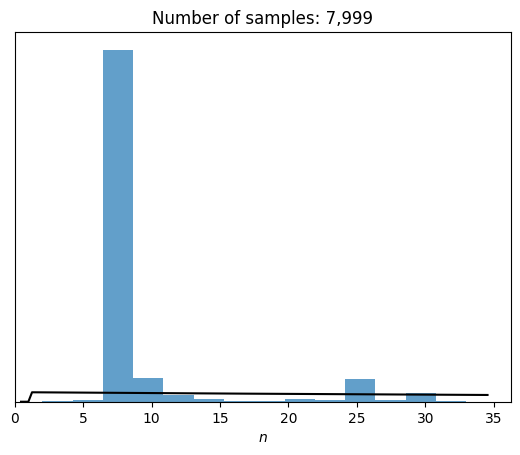

In [260]:
# Program 1

# Load data
file = results(inference, 1)
data = np.loadtxt(file)

# Distribution
p = 0.01
dist = geom(p)

# Make plot
fig, ax = plt.subplots()
plt.title('Number of samples: {:,}'.format(data.shape[0]))
plt.hist(data, density=True, bins='auto', alpha=0.7)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 128)
plt.plot(x, dist.pmf(x), color='black')
plt.xlabel(r'$n$')
plt.xlim(left=0.)
plt.yticks([])
plt.show()

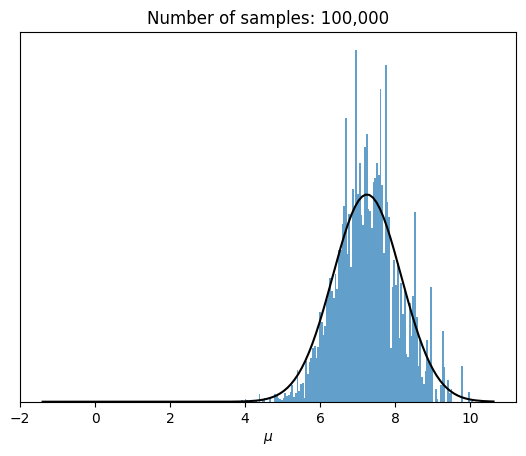

In [261]:
# Program 2

# Load data
file = results(inference, 2)
data = np.loadtxt(file)

# Distribution
if inference is None:
    mu_n, sig_n = 1., np.sqrt(5)
else:
    mu_0, sig_0 = 1., np.sqrt(5.)
    sig = np.sqrt(2.)
    ys = [8., 9.] 
    mu_n, sig_n = analytical_posterior_parameters(ys, mu_0, sig_0, sig)
dist = norm(mu_n, sig_n)

# Make plot
fig, ax = plt.subplots()
plt.title('Number of samples: {:,}'.format(data.shape[0]))
plt.hist(data, density=True, bins='auto', alpha=0.7)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 128)
plt.plot(x, dist.pdf(x), color='black')
plt.xlabel(r'$\mu$')
plt.yticks([])

plt.show()

In [262]:
mu_n

7.249999999999998

In [263]:
np.mean(data)

7.28471905177474

In [264]:
np.mean(data[100:5000])

7.470493679338572

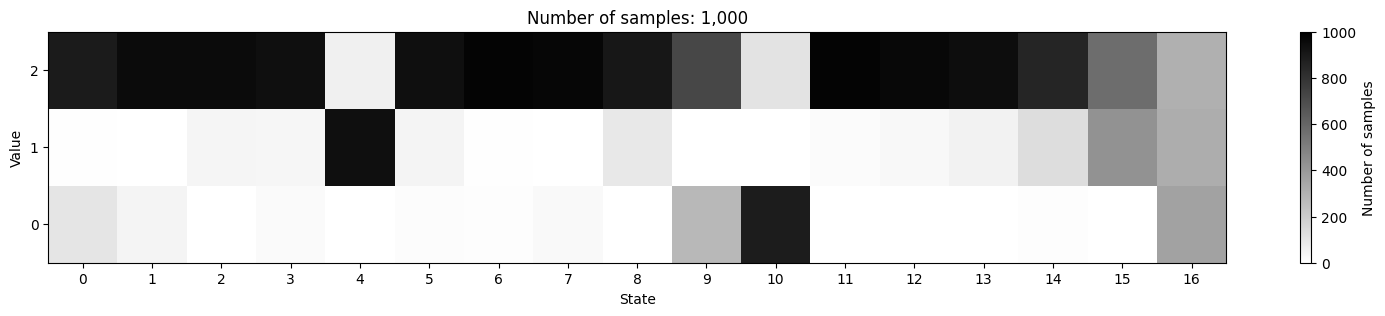

In [320]:
# Program 3

# Load data
file = results(inference, 3)
data = np.loadtxt(file)

# Make plot
xs = np.linspace(0, data.shape[1]-1, num=data.shape[1])
x = []; y = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        x.append(xs[j])
        y.append(data[i, j])
fig, _ = plt.subplots(figsize=(19, 3))
plt.title('Number of samples: {:,}'.format(data.shape[0]))
plt.hist2d(x, y, bins=(17, 3), range=[[-0.5, 16.5], [-0.5, 2.5]], vmin=0., vmax=data.shape[0], density=False, cmap='binary')
plt.xticks(list(range(17)))
plt.xlabel('State')
plt.yticks([0, 1, 2])
plt.ylabel('Value')
plt.colorbar(label='Number of samples')
plt.show()

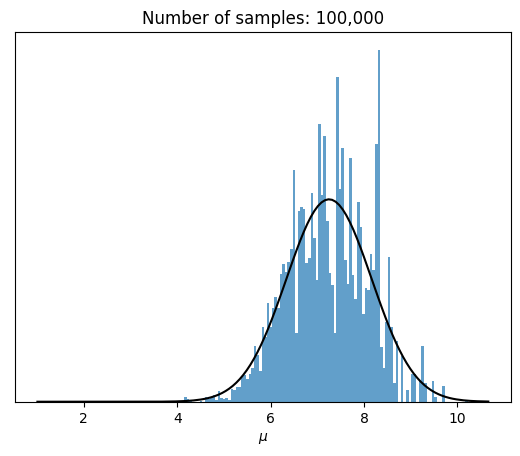

In [266]:
# Program 4

# Load data
file = results(inference, 4)
data = np.loadtxt(file)

# Distribution
if inference is None:
    mu_n, sig_n = 1., np.sqrt(5)
else:
    mu_0, sig_0 = 1., np.sqrt(5.)
    sig = np.sqrt(2.)
    ys = [8., 9.] 
    mu_n, sig_n = analytical_posterior_parameters(ys, mu_0, sig_0, sig)
dist = norm(mu_n, sig_n)

# Make plot
fig, ax = plt.subplots()
plt.title('Number of samples: {:,}'.format(data.shape[0]))
plt.hist(data, density=True, bins='auto', alpha=0.7)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 128)
plt.plot(x, dist.pdf(x), color='black')
plt.xlabel(r'$\mu$')
plt.yticks([])

plt.show()

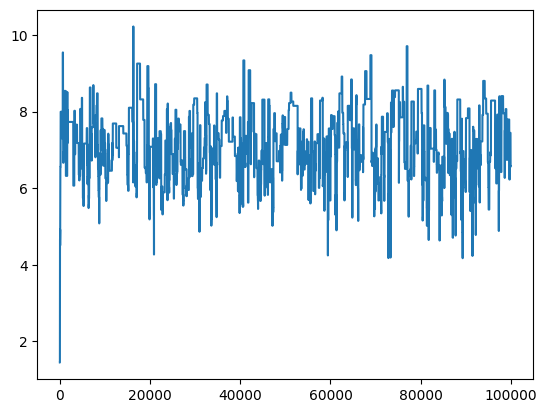

In [267]:
plt.plot(data)

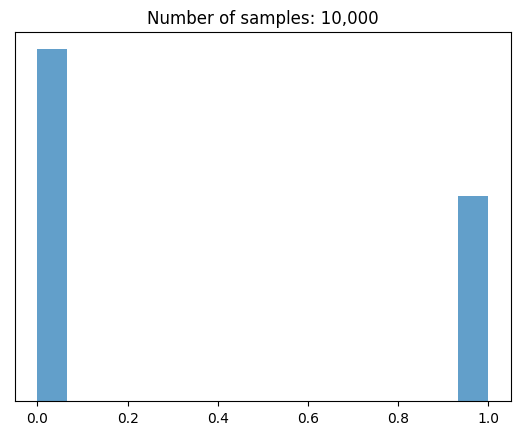

In [322]:
# Program 7

# Load data
file = results(inference, 7)
data = np.loadtxt(file)

# Make plot
fig, ax = plt.subplots()
plt.title('Number of samples: {:,}'.format(data.shape[0]))
plt.hist(data, density=True, bins='auto', alpha=0.7)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 128)
plt.yticks([])

plt.show()

In [323]:
np.mean(data)

0.3683

In [324]:
per_change = [sum(data[range(1,i)])/i for i in range(1, len(data))]

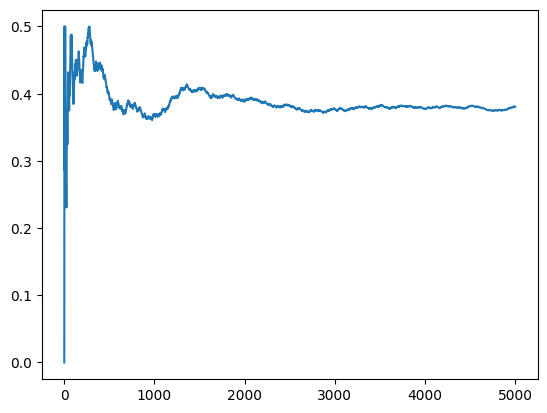

In [326]:
plt.plot(per_change[1:5000])